<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Images-Extractions" data-toc-modified-id="Images-Extractions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Images Extractions</a></span><ul class="toc-item"><li><span><a href="#Explore-datasets" data-toc-modified-id="Explore-datasets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Explore datasets</a></span></li><li><span><a href="#Checking-if-cloud-is-uniform-on-all-the-coordinate-of-an-image" data-toc-modified-id="Checking-if-cloud-is-uniform-on-all-the-coordinate-of-an-image-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Checking if cloud is uniform on all the coordinate of an image</a></span></li><li><span><a href="#Some-visulizations" data-toc-modified-id="Some-visulizations-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Some visulizations</a></span></li></ul></li><li><span><a href="#First-Baseline-With-Sklearn" data-toc-modified-id="First-Baseline-With-Sklearn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>First Baseline With Sklearn</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Modelisation" data-toc-modified-id="Modelisation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Modelisation</a></span></li><li><span><a href="#convert-To-tensor-Dataset" data-toc-modified-id="convert-To-tensor-Dataset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>convert To tensor Dataset</a></span></li><li><span><a href="#Eval-on-test-set" data-toc-modified-id="Eval-on-test-set-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Eval on test set</a></span><ul class="toc-item"><li><span><a href="#Gridsearch" data-toc-modified-id="Gridsearch-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Gridsearch</a></span></li><li><span><a href="#Predict-GIZ-Biomass" data-toc-modified-id="Predict-GIZ-Biomass-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Predict GIZ Biomass</a></span></li></ul></li></ul></li></ul></div>

In this notebook, we will show you the differents steps to train step by step dly your model in this competition.

# Images Extractions

In [1]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import tensorflow as tf
import seaborn as sns
warnings.filterwarnings('ignore')

2023-04-29 14:48:26.133220: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 14:48:26.218178: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-29 14:48:26.220600: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-29 14:48:26.220615: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

In [2]:
#!wget -q  https://share.phys.ethz.ch/~pf/albecker/abc/09072022_1154_train.h5
#!wget -q  https://share.phys.ethz.ch/~pf/albecker/abc/09072022_1154_val.h5
#!wget -q https://share.phys.ethz.ch/~pf/albecker/abc/09072022_1154_test.h5

In [67]:
trainset = h5py.File("./data/09072022_1154_train.h5", "r")
validateset = h5py.File("./data/09072022_1154_val.h5", "r")
testset = h5py.File("./data/09072022_1154_test.h5", "r")
ID_S2_pair = pd.read_csv('./data/UniqueID-SentinelPair.csv')


In [4]:
# attributes of trainset
trainset.keys()

<KeysViewHDF5 ['agbd', 'cloud', 'images', 'lat', 'lon', 'scl']>

In [5]:
np.array(trainset['scl']).max()

10

## Explore datasets

In [6]:
# train
train_images = np.array(trainset['images'],dtype=np.float64)
train_images = train_images.transpose(0,3,1,2)

train_lat = np.array(trainset['lat'],dtype=np.float64)
train_lon = np.array(trainset['lon'],dtype=np.float64)
train_cloud = np.array(trainset['cloud'],dtype=np.float64)


train_biomasses = np.array(trainset['agbd'],dtype=np.float64)

# validate
validate_images = np.array(validateset['images'],dtype=np.float64)
validate_images = validate_images.transpose(0,3,1,2)

validate_lat = np.array(validateset['lat'],dtype=np.float64)
validate_lon = np.array(validateset['lon'],dtype=np.float64)
validate_cloud = np.array(validateset['cloud'],dtype=np.float64)


validate_biomasses = np.array(validateset['agbd'],dtype=np.float64)

# test 
test_images = np.array(testset['images'],dtype=np.float32)
test_images = test_images.transpose(0,3,1,2)
test_lat = np.array(testset['lat'],dtype=np.float64)
test_lon = np.array(testset['lon'],dtype=np.float64)
test_cloud = np.array(testset['cloud'],dtype=np.float64)


test_biomasses = np.array(testset['agbd'],dtype=np.float32)

In [54]:
test_biomasses

array([32.716705, 16.435284, 28.50325 , ..., 17.065517, 30.835793,
       15.964449], dtype=float32)

In [7]:
print(f"train dataset size {train_images.shape} train lab size {train_biomasses.shape}")
print()
print(f"validate dataset size {validate_images.shape} validate lab size {validate_biomasses.shape}")
print()
print(f"test dataset size {test_images.shape} test lab size {test_biomasses.shape}")

train dataset size (25036, 12, 15, 15) train lab size (25036,)

validate dataset size (5174, 12, 15, 15) validate lab size (5174,)

test dataset size (5190, 12, 15, 15) test lab size (5190,)


<AxesSubplot: ylabel='Frequency'>

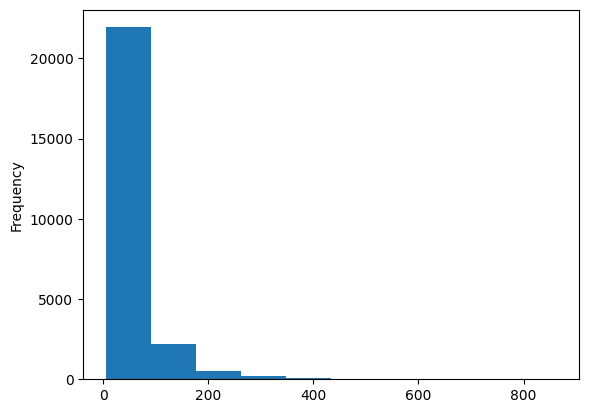

In [8]:
pd.Series(train_biomasses).plot(kind='hist')

<AxesSubplot: ylabel='Frequency'>

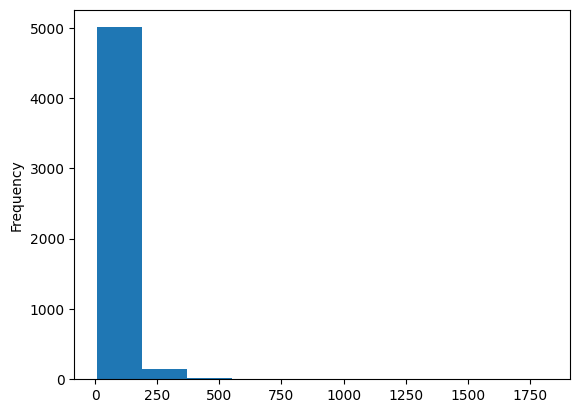

In [9]:
pd.Series(validate_biomasses).plot(kind='hist')

We can see that in validation set there are higher values that in the train set. Maybe it can explain the difference between the train performance and the submition score

In [10]:
train_cloud.shape

(25036, 15, 15, 1)

In [11]:
train_cloud[0].shape

(15, 15, 1)

## Checking if cloud is uniform on all the coordinate of an image

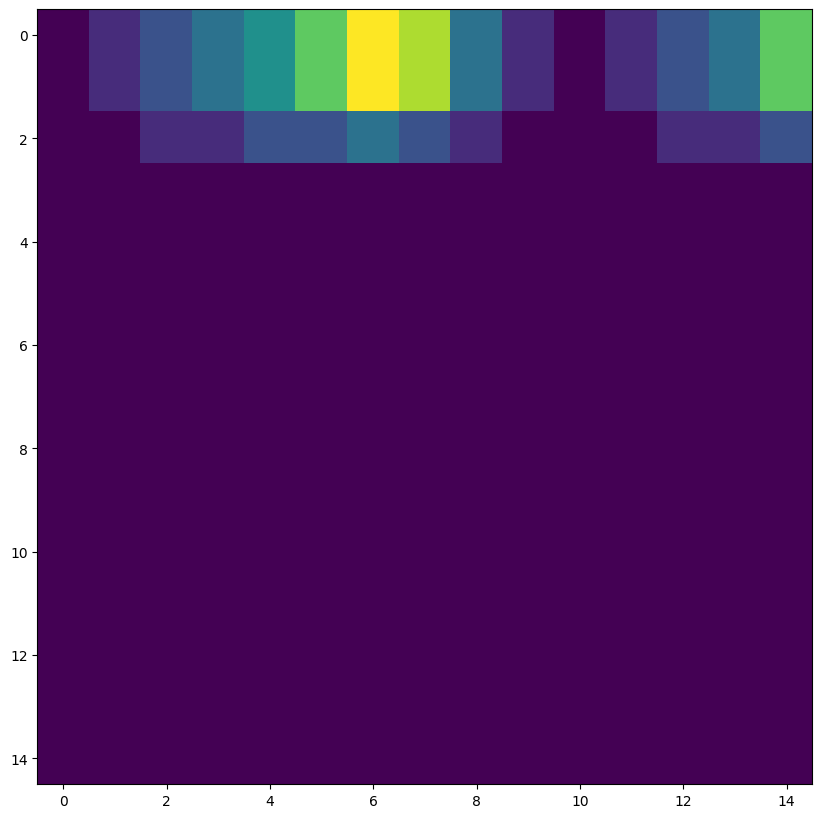

In [12]:
def visualize_cloud( index):
    plt.figure(figsize=(10,15))
    plt.imshow(train_cloud[index])
    
    
visualize_cloud(-2)

In [13]:
index_dif=np.max(train_cloud.reshape((-1, 225)), axis=-1)!=np.min(train_cloud.reshape((-1, 225)), axis=-1)

In [14]:
train_cloud[index_dif].shape

(7254, 15, 15, 1)

##  Some visulizations

In [15]:
train_images.shape

(25036, 12, 15, 15)

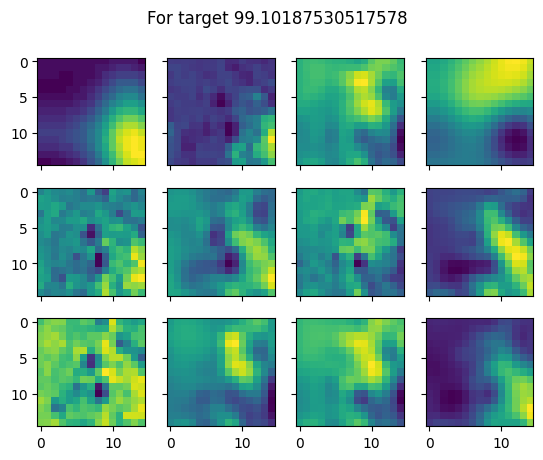

In [16]:
def visualize_images( index):
    fig, axs = plt.subplots(3,4, sharex=True, sharey=True)
    for k in range(3):
        for l in range (4):
            axs[k,l].imshow(train_images[index,3*l+k])
            fig.suptitle(f'For target {train_biomasses[index]}')
visualize_images(1)


(array([2.1933e+04, 2.1950e+03, 5.4600e+02, 2.2100e+02, 9.1000e+01,
        3.4000e+01, 1.0000e+01, 3.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  4.51173067,  90.35848851, 176.20524635, 262.05200419,
        347.89876204, 433.74551988, 519.59227772, 605.43903556,
        691.2857934 , 777.13255124, 862.97930908]),
 <BarContainer object of 10 artists>)

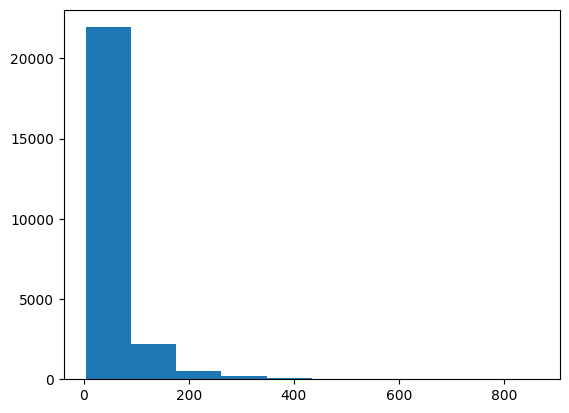

In [17]:
plt.hist(train_biomasses)

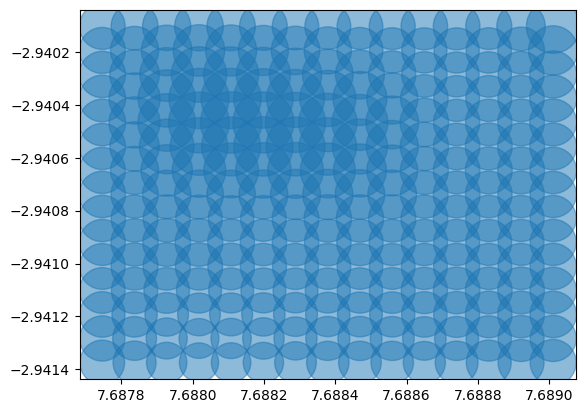

In [18]:
def image_pos(index,f):
    x=train_lat[index].reshape(225)
    y=train_lon[index].reshape(225)
    area=train_images[0,f].reshape(225)
    #colors = np.random.rand(225)
    plt.scatter(x, y, s=area
                #,c=colors
                ,alpha=0.5)
image_pos(1,11)

 **Below we explore the skewness of train dataset in each channel**

In [42]:
band_skewness = []
band_skewness_after_sqrt = []
for c in range(12):
    #calculate skewness
    band_skewness.append(pd.Series(train_images[:,c].flatten()).skew())
    #calculate skewness after applying sqrt
    band_skewness_after_sqrt.append(pd.Series(np.sqrt(train_images[:,c].flatten())).skew())

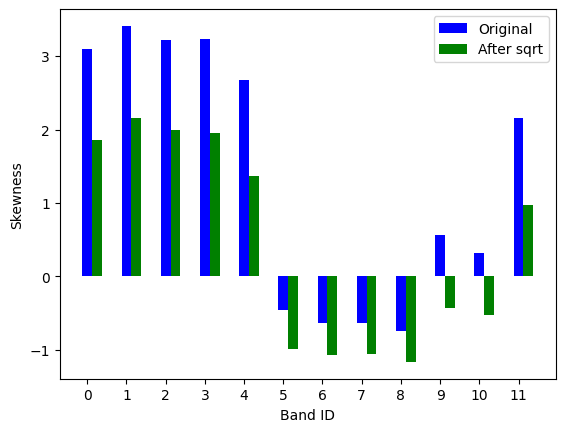

In [43]:
# skweness
width = 0.25

rng = [i for i in range(0,12)]
rng2 = [i+width for i in range(0,12)]

plt.bar(rng, band_skewness, align='center', width = width, label='Original', color ='b')
plt.bar(rng2, band_skewness_after_sqrt, align='center', width = width, label='After sqrt', color ='g')
plt.gca().set_xticks(rng)
plt.legend()
plt.xlabel('Band ID')
plt.ylabel('Skewness')
plt.show()

In [44]:
band_skewness = []
band_skewness_after_sqrt = []
for c in range(12):
    #calculate skewness
    band_skewness.append(pd.Series(train_images[:,c].flatten()).skew())
    #calculate skewness after applying sqrt
    band_skewness_after_sqrt.append(pd.Series(np.log(train_images[:,c].flatten()+1)).skew())

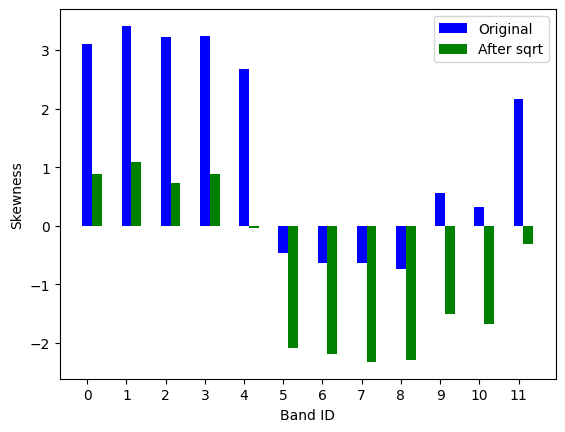

In [45]:
# skweness
width = 0.25

rng = [i for i in range(0,12)]
rng2 = [i+width for i in range(0,12)]

plt.bar(rng, band_skewness, align='center', width = width, label='Original', color ='b')
plt.bar(rng2, band_skewness_after_sqrt, align='center', width = width, label='After sqrt', color ='g')
plt.gca().set_xticks(rng)
plt.legend()
plt.xlabel('Band ID')
plt.ylabel('Skewness')
plt.show()

**Lets do the same for validation**

In [29]:
band_skewness_val = []
band_skewness_after_sqrt_val = []
for c in range(12):
    #calculate skewness
    band_skewness_val.append(pd.Series(validate_images[:,c].flatten()).skew())
    #calculate skewness after applying sqrt
    band_skewness_after_sqrt_val.append(pd.Series(np.log(validate_images[:,c].flatten()+1)).skew())

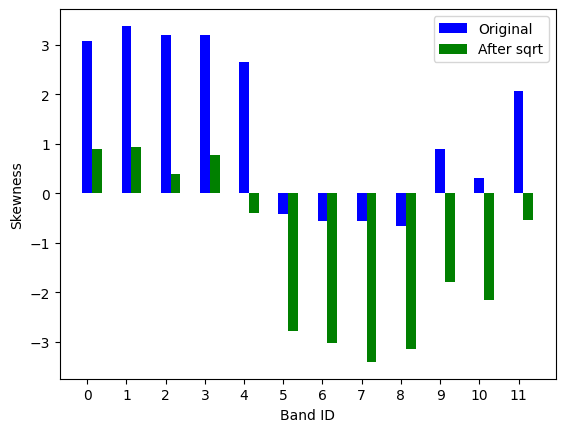

In [33]:
# skweness
width = 0.25

rng = [i for i in range(0,12)]
rng2 = [i+width for i in range(0,12)]

plt.bar(rng, band_skewness_val, align='center', width = width, label='Original', color ='b')
plt.bar(rng2, band_skewness_after_sqrt_val, align='center', width = width, label='After sqrt', color ='g')
plt.gca().set_xticks(rng)
plt.legend()
plt.xlabel('Band ID')
plt.ylabel('Skewness')
plt.show()

# First Baseline With Sklearn

In [46]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD,PCA

In [47]:
from sklearn import set_config
set_config(display='diagram')

In [48]:
train_images.shape, train_lat.shape, train_lon.shape, train_cloud.shape

((25036, 12, 15, 15),
 (25036, 15, 15, 1),
 (25036, 15, 15, 1),
 (25036, 15, 15, 1))

In [49]:
train_images.reshape((25036, 2700)).shape,train_lat[:,:,0].reshape((-1,15)).shape,train_cloud[:,:,:].reshape((-1,225)).shape

((25036, 2700), (25036, 15), (25036, 225))

In [50]:
train_images.mean((0,2,3)).shape

(12,)

# Preprocessing

In [69]:
def preprocessing(trainset, is_test=False):
    train_images = np.array(trainset['images'],dtype=np.float64)
    train_images = train_images.transpose(0,3,1,2)

    train_lat = np.array(trainset['lat'],dtype=np.float64)
    train_lon = np.array(trainset['lon'],dtype=np.float64)
    train_cloud = np.array(trainset['cloud'],dtype=np.float64)
    train_scl = np.array(trainset['scl'],dtype=np.float64)

    if not is_test:
        train_biomasses = np.array(trainset['agbd'],dtype=np.float64)
        Y= train_biomasses
    X=np.concatenate((
                    train_images.reshape((-1, 2700)), 
                    train_lat[:,:,0][:,0],
                    train_lat[:,:,0][:,-1],
        
                    train_lon[:,0,:][:,0],
                    train_lon[:,0,:][:,-1]
                    #train_scl[:,:,:].reshape((-1,225))
                    ), axis=-1)
    columns_names=[f'image_{k}' for k in range(2700)]\
                    +['lat_max']\
                    +['lat_min']\
                    +['lon_min']\
                    +['lon_max']
            #+[f'cloud_{k}' for k in range(225)]\
            #+[f'scl_{k}' for k in range(225)]\

            #+[f'lon{k}' for k in range(15)]\
    X=pd.DataFrame(X, columns=columns_names)
    
    return X,Y if not is_test else X
X,Y=preprocessing(trainset)
X_valide,Y_valide=preprocessing(validateset)
X_test,Y_test=preprocessing(testset)

In [82]:
X_test.rename

,ID,S2_idx
0,ID_1EB0DGFP07,44
1,ID_844T2PSXTK,58
2,ID_4MCV3S8MLN,27
3,ID_L7441JV5F3,68
4,ID_5GUVM4YEWZ,57
...,...,...
85,ID_MEW6189J1B,41
86,ID_TH9HRUXGTP,52
87,ID_GPC7YS3JG8,79
88,ID_1P7PJMPV0R,0


In [53]:
def range_coordinate(label,X):
    return X[[k for k in X.columns if label in k ]].min().min(),X[[k for k in X.columns if label in k ]].min().min()

print(f"{range_coordinate('lat',X_valide),range_coordinate('lat',X)}")
print(f"{range_coordinate('lon',X_valide),range_coordinate('lon',X)}")
#print(f"{range_coordinate('lon',X_valide),range_coordinate('lat',X)")
#print(f"{range_coordinate('lon',X_valide),range_coordinate('lon',X)}")



((5.143407344818115, 5.143407344818115), (5.145659923553467, 5.145659923553467))
((-8.35700798034668, -8.35700798034668), (-8.389339447021484, -8.389339447021484))


from sklearn.preprocessing import FunctionTransformer

def std_range(X, min_, max_):
    return (X-X.mean())/X.std()
    

## Modelisation

In [60]:
def generate_pipeline(model,num_feat, cat_feat):
    # We create the preprocessing pipelines for both numeric and categorical data.

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_feat),
            ('cat', categorical_transformer, cat_feat)])
    
    # Append classifier to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('dim_reduction',PCA(n_components=30)),
                              ('regressor', model)])
    return clf

clf=generate_pipeline(RandomForestRegressor(), X.columns, [])

## convert To tensor Dataset


In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR, NuSVR
from xgboost  import XGBRFRegressor
from sklearn.ensemble import StackingRegressor, BaggingRegressor

models=[
    ('DecisionTreeRegressor',DecisionTreeRegressor()),
    ('GaussianNB',GaussianNB()),
    ('SGDRegressor',SGDRegressor()),
    ('LinearSVR',LinearSVR()),
    ('NuSVR',NuSVR()),
    ('XGBRFRegressor',XGBRFRegressor()),
    ('RandomForestRegressor', RandomForestRegressor())
    #('LinearSVR',LinearSVR()),
]

In [63]:
import itertools
list(itertools.product([0,1],[0,1]))

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [64]:
np.linspace(1,12,4)

array([ 1.        ,  4.66666667,  8.33333333, 12.        ])

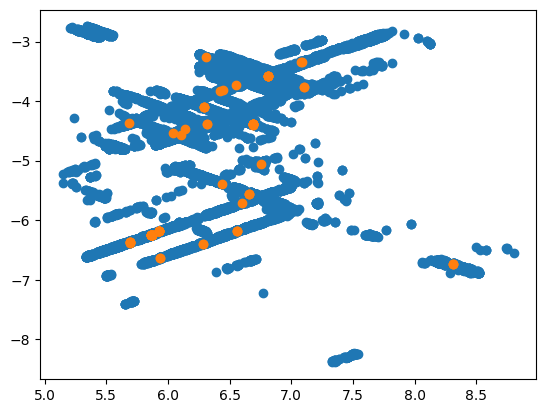

In [118]:
plt.scatter(X.lat_max,X.lon_max)

plt.scatter(X_test_sub.lat_max,X_test_sub.lon_max,)

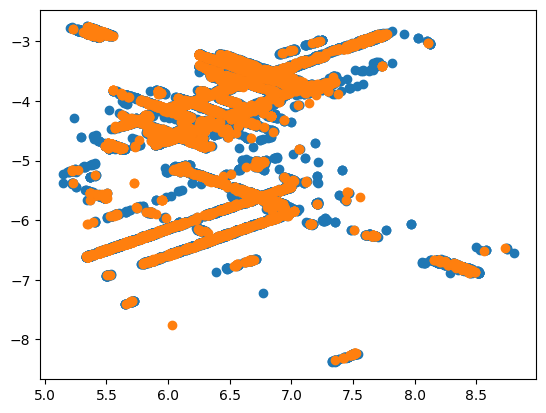

In [66]:
plt.scatter(X.lat_min,X.lon_min)
plt.scatter(X_test.lat_min,X_test.lon_min)

In [125]:
X.loc[X.lat_max.isin(X_test_sub.lat_max)]

,image_0,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,...,image_2694,image_2695,image_2696,image_2697,image_2698,image_2699,lat_max,lat_min,lon_min,lon_max
450,337.0,337.0,337.0,337.0,337.0,337.0,338.0,340.0,341.0,342.0,...,1864.0,2122.0,2255.0,2263.0,2310.0,2394.0,6.813229,6.811963,-3.824842,-3.823574
451,365.0,362.0,362.0,365.0,370.0,376.0,382.0,386.0,388.0,390.0,...,2091.0,2276.0,2443.0,2498.0,2442.0,2418.0,6.812777,6.811511,-3.824570,-3.823302
1231,284.0,281.0,277.0,272.0,267.0,263.0,261.0,260.0,260.0,261.0,...,1123.0,1020.0,1000.0,998.0,1016.0,1027.0,5.691245,5.689975,-6.352852,-6.351593
2051,216.0,213.0,212.0,212.0,213.0,216.0,219.0,223.0,226.0,229.0,...,1253.0,1619.0,1659.0,1372.0,1142.0,971.0,6.811963,6.810698,-3.574159,-3.572891
3257,329.0,329.0,329.0,329.0,330.0,331.0,332.0,333.0,334.0,334.0,...,1023.0,1013.0,1006.0,1030.0,1085.0,1123.0,5.864135,5.862865,-6.678801,-6.677543
5163,315.0,315.0,316.0,317.0,318.0,320.0,321.0,322.0,324.0,326.0,...,1174.0,1197.0,1176.0,1155.0,1133.0,1091.0,5.862865,5.861594,-6.679700,-6.678442
5577,4624.0,4620.0,4597.0,4551.0,4475.0,4378.0,4261.0,4124.0,3967.0,3792.0,...,1376.0,1421.0,1473.0,1482.0,1448.0,1408.0,6.690650,6.689387,-4.383682,-4.382412
5578,3095.0,3095.0,2983.0,2791.0,2555.0,2308.0,2084.0,1908.0,1746.0,1590.0,...,1909.0,1884.0,1802.0,1663.0,1550.0,1462.0,6.690199,6.688936,-4.383410,-4.382140
6156,421.0,419.0,416.0,413.0,410.0,408.0,408.0,410.0,413.0,417.0,...,1233.0,1271.0,1338.0,1529.0,1845.0,1968.0,6.282793,6.281522,-6.391685,-6.390427
7225,394.0,393.0,392.0,392.0,392.0,393.0,393.0,395.0,397.0,400.0,...,1470.0,1416.0,1322.0,1232.0,1147.0,1085.0,6.599917,6.598644,-5.488927,-5.487670


In [40]:
np.max(train_lat), np.min(train_lat),np.max(test_lat),np.min(test_lat)

(8.804115295410156, 5.145659923553467, 8.735198974609375, 5.216835021972656)

In [41]:
def cross_coordinate(X, x_name_max,x_name_min,y_name_max, y_name_min,grid_size):
    x_interval=np.linspace(np.min(X[x_name_min]),np.max(X[x_name_max]), num=grid_size )
    y_interval=np.linspace(np.min(X[y_name_min]) ,np.max(X[y_name_max]), num=grid_size)
    print(x_interval)
    for vec in itertools.product([0,1],[0,1]):
        print(vec)
        train_index=X.loc[(X[x_name_max] < x_interval[grid_size-2+ vec[0]]) & (X[x_name_min] >= x_interval[vec[0]])\
                   &(X[y_name_max] < y_interval[grid_size-2+ vec[1]] )&( X[y_name_min] >= y_interval[vec[1]])
                   ].index
        test_index=X.loc[~X.index.isin(train_index)].index
        print(f'the ratio of train/test is {len(train_index)/len(test_index)}')
        yield train_index ,test_index
    

In [191]:
list(cross_coordinate(X, 'lat_max', 'lat_min','lon_max','lon_min',11))[0]
#TODO : investigate the outlier ratio for (0,1) something is wrong somewhere

[5.14565992 5.51150546 5.877351   6.24319654 6.60904207 6.97488761
 7.34073315 7.70657868 8.07242422 8.43826976 8.8041153 ]
(0, 0)
the ratio of train/test is 7.568104038329911
(0, 1)
the ratio of train/test is 147.14201183431953
(1, 0)
the ratio of train/test is 6.11856696047768
(1, 1)
the ratio of train/test is 13.884661117717004


(Int64Index([    0,     2,     3,     4,     5,     6,     7,     8,     9,
                10,
             ...
             25026, 25027, 25028, 25029, 25030, 25031, 25032, 25033, 25034,
             25035],
            dtype='int64', length=22114),
 Int64Index([    1,    49,    58,    59,    60,    92,    93,    94,   117,
               124,
             ...
             24956, 24957, 24971, 24972, 24973, 25012, 25013, 25015, 25024,
             25025],
            dtype='int64', length=2922))

In [85]:
X_test_sub=X_test.rename_axis('S2_idx').reset_index()
X_test_sub = ID_S2_pair.merge(X_sub, on='S2_idx')
Y_test_sub=pd.DataFrame(Y_test, columns=['Target']).rename_axis('S2_idx').reset_index()
Y_test_sub = ID_S2_pair.merge(Y_sub, on='S2_idx')

In [102]:
X_test_check=X_test.loc[~X_test.index.isin(ID_S2_pair.S2_idx)]
Y_test_check=Y_test[X_test_check.index]
X_test_check.shape,Y_test_check.shape

((5100, 2704), (5100,))

In [95]:
#Y_sub.to_csv('./dummy.csv', index=False)

In [98]:
print(f'the length of the submission file is {Y_sub.shape[0], ID_S2_pair.shape[0]}')

the length of the submission file is (90, 90)


In [103]:
N_SPLIT=3
def train_cross(model, n_split, X,Y):
    results=[]
    cv=KFold(n_splits=n_split)    
    clf=generate_pipeline(model, X.columns, [])
    for i,(train_index, test_index) in enumerate(cv.split(X,Y)):
        print(f'>>> the split {i} ')
        X_train,Y_train=X.iloc[train_index], Y[train_index]
        X_test ,Y_test=X.iloc[test_index], Y[test_index]
        
        clf.fit(X_train,Y_train)
        prediction=clf.predict(X_test)
        result=np.sqrt(mean_squared_error(Y_test, prediction))
        print(f">>>> the sqrtmse {result}")
        results.append(result)
    #stack=StackingRegressor(estimators=models_, final_estimator=top_model, cv='prefit')
    #stack.fit(X_top, Y_top)
    #result_stack=np.sqrt(mean_squared_error(Y, stack.predict(X)))
    print(f">>>> mean on all split is  {np.mean(results)}")
    
    
    return results

    
    

In [38]:
#mod,res,result_stack, stack=train_cross([ (f'XGBRFRegressor_{k}',XGBRFRegressor()) for k in range(3) ],XGBRFRegressor(),X,Y)

In [211]:
results=train_cross(XGBRFRegressor(),N_SPLIT,X,Y)
results

>>> the split 0 
>>>> the sqrtmse 56.64483398814617
>>> the split 1 
>>>> the sqrtmse 54.69999910153487
>>> the split 2 
>>>> the sqrtmse 54.344649025594684
>>>> mean on all split is  55.229827371758574


[56.64483398814617, 54.69999910153487, 54.344649025594684]

In [76]:
def evaluate_by_model_stack(models, X,Y):
    return [np.sqrt(mean_squared_error(Y, k.predict(X))) for name, k in models]
def evaluate_stack(models, X,Y):
    prediction=models[0][1].predict(X)
    for name,mod in models[1:]:
        prediction+=mod.predict(X)
        print(f'{name} prediction')
    return np.sqrt( mean_squared_error( Y, prediction/len(models)))

evaluate_stack( mod, X_valide,Y_valide),evaluate_by_model_stack(mod,X,Y)
#xgb (62.686876149809216, [53.25848247989811, 52.88690403605642, 53.47845277555761])

model_1 prediction
model_2 prediction


(62.60397911444443, [53.262656508861085, 52.95711451828585, 53.21542301992689])

In [ ]:
import optuna
from functools import partial

def optimize(trial, X, Y ):
    
    n_estimators=trial.suggest_int('n_estimators',100,1500)
    max_depth=trial.suggest_int('max_depth',5,20)
    gamma=trial.suggest_int('gamma',0.1,1)
    min_child_weight=trial.suggest_int('min_child_weight',0.1,1)
    max_leaves=trial.suggest_int('max_leaves',0.1,1)
    
    model=XGBRFRegressor(n_estimators=n_estimators,
                                                   max_depth=max_depth,
                                                   gamma=gamma,
                                                   min_child_weight=min_child_weight,
                                                   max_leaves=max_leaves
                                                   
                                                    )
    res=train_cross(model,N_SPLIT,X,Y)
    return np.mean(res)
optimization_function=partial( optimize, X=X,Y=Y)
study= optuna.create_study(direction='minimize')
study.optimize(optimization_function, n_trials=5)

[I 2023-04-18 20:35:44,124] A new study created in memory with name: no-name-effacbda-ac83-4938-aa51-483fde935955


>>> the split 0 
>>>> the sqrtmse 56.63800333944159
>>> the split 1 
>>>> the sqrtmse 54.79957898982902
>>> the split 2 


[I 2023-04-18 20:36:49,252] Trial 0 finished with value: 55.266357260364316 and parameters: {'n_estimators': 125, 'max_depth': 8, 'gamma': 1, 'min_child_weight': 1, 'max_leaves': 0}. Best is trial 0 with value: 55.266357260364316.


>>>> the sqrtmse 54.36148945182233
>>>> mean on all split is  55.266357260364316
>>> the split 0 
>>>> the sqrtmse 56.86752705551129
>>> the split 1 
>>>> the sqrtmse 55.01059484696611
>>> the split 2 


[I 2023-04-18 20:46:19,859] Trial 1 finished with value: 55.45268427284535 and parameters: {'n_estimators': 796, 'max_depth': 17, 'gamma': 1, 'min_child_weight': 1, 'max_leaves': 1}. Best is trial 0 with value: 55.266357260364316.


>>>> the sqrtmse 54.479930916058656
>>>> mean on all split is  55.45268427284535
>>> the split 0 


In [49]:
# Trial 3 finished with value: 88.45822296514622 and parameters:
#{'n_estimators': 671, 'max_depth': 16, 'gamma': 0, 'min_child_weight': 1,
#'max_leaves': 0, 'n_estimators_top': 439, 'max_depth_top': 5, 'gamma_top': 0, 
#'min_child_weight_top': 0, 'max_leaves_top': 0}. 
#Best is trial 3 with value: 88.45822296514622.

In [111]:
X_all=pd.concat([X,X_valide,X_test_check])
Y_all=np.concatenate([Y,Y_valide,Y_test_check])

In [112]:
X_valide.shape

(5174, 2704)

In [113]:
X_all.shape, X.shape

((35310, 2704), (25036, 2704))

In [114]:
#models=[ (f'XGBRFRegressor_{k}',XGBRFRegressor(n_estimators=671,
#                                                   max_depth=16,
#                                                   gamma=0,
#                                                   min_child_weight=1,
#                                                   max_leaves=0
#                                                    )) for k in range(3) ]
model=XGBRFRegressor(**{'n_estimators': 959, 'max_depth': 12, 'gamma': 1, 'min_child_weight': 0, 'max_leaves': 0}
)
clf=generate_pipeline(model, X.columns, [])
clf.fit(X_all, Y_all)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['image_0', 'image_1', 'image_2', 'image_3', 'image_4', 'image_5',
       'image_6', 'image_7', 'image_8', 'image_9',
       ...
       'image_2694', 'image_2695', 'image_2696', 'image_2697', 'image_2698',
       'image_2699',...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, max_bin=None,
                                max_cat_threshold=None, max_cat_to_onehot=None,
                                max_delta_step=None, max_depth=12, max_leaves=0,
                                min_child_weight=0, missing=nan,
                                monotone_constraints=None, n_estimators=959,
                                n_jobs=None, num_parallel_tree=None,
                                objective='reg:squarederror', predictor=None,
                                random_state=None, reg_alpha=None, ...))])

## Eval on test set

In [115]:
prediction_check=clf.predict(X_test_check)
np.sqrt(mean_squared_error(Y_test_check, prediction_check))

45.17098053095213

In [79]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import Huber, MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import RMSprop, Adam,SGD
import tensorflow.keras.backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 


def input_ly( shape, data, norm=True):
    input_ = keras.Input(shape=shape)
    normalizer = tf.keras.layers.Normalization()
    normalizer.adapt(data)
    x_image = normalizer(input_)
    return input_, x_image


def generate_compile_model():
    model_v1 = tf.keras.models.Sequential([    
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(100, activation='sigmoid'),
            #tf.keras.layers.Dense(150, activation='relu'),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(40, activation='relu'),
            
        ])
    inputs_image,x_image= input_ly(( 12,15,15), train_images)
    inputs_lat, x_lat=input_ly((15,1), train_lat, False)
    inputs_lon, x_lon=input_ly((15,1), train_lon, False)
    inputs_cloud, x_cloud=input_ly((225,1), train_cloud, False)
    
    #x_image=tf.keras.layers.Flatten()(x_image)
    print(x_image.shape)
    print(x_image)
    x_image= tf.keras.layers.EinsumDense(
                          "abcd,bce->ade",
                            output_shape=(None, 15,15),
    )(x_image)

    outputs_images = model_v1(x_image)
    
    coord=tf.keras.layers.Concatenate(axis=1)([x_lat[0],x_lon[0],x_cloud[0]])
    coord=tf.keras.layers.Flatten()(coord)
    coord= tf.keras.layers.Dense(150, activation='sigmoid')( coord)
    coord= tf.keras.layers.Dropout(0.3)( coord)
    coord= tf.keras.layers.Dense(100, activation='relu')( coord)
    coord= tf.keras.layers.Dropout(0.3)( coord)
    coord= tf.keras.layers.Dense(50, activation='relu')( coord)
    #coord= tf.keras.layers.Dropout(0.3)( coord)
    
    coord=tf.keras.layers.Concatenate(axis=-1)([coord,outputs_images])
    coord= tf.keras.layers.Dense(150, activation='relu')( coord)
    coord= tf.keras.layers.Dropout(0.3)( coord)
    coord= tf.keras.layers.Dense(100, activation='relu')( coord)
    coord= tf.keras.layers.Dropout(0.3)( coord)
    coord= tf.keras.layers.Dense(50, activation='relu')( coord)
    #coord= tf.keras.layers.Dense(150, activation='relu')( coord)
    coord= tf.keras.layers.Dropout(0.3)( coord)
    coord=tf.keras.layers.Dense(1, activation='relu')( coord)
    outputs= tf.keras.layers.Lambda(lambda x:x*160)(coord)
    model = keras.Model([inputs_image, inputs_lat,inputs_lon, inputs_cloud], outputs)
    
    model.compile(optimizer = Adam(
                    learning_rate=1e-4),
        loss = root_mean_squared_error, 
        metrics = [RootMeanSquaredError()]        
    )
    return model, model_v1
model, model_v1=generate_compile_model()


(None, 12, 15, 15)
KerasTensor(type_spec=TensorSpec(shape=(None, 12, 15, 15), dtype=tf.float32, name=None), name='normalization_32/truediv:0', description="created by layer 'normalization_32'")
[12, 15, 15]
12
[225, 100]
[100, 40]
[255, 150]
[150, 100]
[100, 50]
[90, 150]
[150, 100]
[100, 50]
[50, 1]


In [80]:
model_v1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 225)               0         
                                                                 
 dense_44 (Dense)            (None, 100)               22600     
                                                                 
 dropout_16 (Dropout)        (None, 100)               0         
                                                                 
 dense_45 (Dense)            (None, 40)                4040      
                                                                 
Total params: 26,640
Trainable params: 26,640
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_35 (InputLayer)          [(None, 15, 1)]      0           []                               
                                                                                                  
 input_36 (InputLayer)          [(None, 15, 1)]      0           []                               
                                                                                                  
 input_37 (InputLayer)          [(None, 225, 1)]     0           []                               
                                                                                                  
 normalization_33 (Normalizatio  (1, None, 15, 1)    3           ['input_35[0][0]']               
 n)                                                                                         

In [82]:
# constante for standardization
MEAN = train_images.mean((0,2,3))
STD = train_images.std((0,2,3))

In [83]:
# Evaluate( with the hands) the max
np.max(train_images.reshape(25036, 12,225),axis=2).max()

15687.0

In [84]:
checkpoint_filepath='./checkpoints/'

In [85]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_root_mean_squared_error',
    mode='min',
    save_best_only=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,min_delta=0.1,
                              patience=3, min_lr=1e-10)


In [86]:
history=model.fit(
            traindata,
        validation_data = validatedata,
            #steps_per_epoch = 100,
            epochs = 100,
            #validation_steps = 50,
            callbacks=[model_checkpoint_callback,reduce_lr],
            verbose = 2)

Epoch 1/100
783/783 - 3s - loss: 57.2969 - root_mean_squared_error: 61.2401 - val_loss: 59.9115 - val_root_mean_squared_error: 68.9350 - lr: 1.0000e-04 - 3s/epoch - 3ms/step
Epoch 2/100
783/783 - 2s - loss: 53.6601 - root_mean_squared_error: 57.7870 - val_loss: 58.3508 - val_root_mean_squared_error: 67.5699 - lr: 1.0000e-04 - 2s/epoch - 2ms/step
Epoch 3/100
783/783 - 2s - loss: 53.0745 - root_mean_squared_error: 57.1994 - val_loss: 57.0979 - val_root_mean_squared_error: 66.4274 - lr: 1.0000e-04 - 2s/epoch - 2ms/step
Epoch 4/100
783/783 - 2s - loss: 52.7259 - root_mean_squared_error: 56.9175 - val_loss: 56.4420 - val_root_mean_squared_error: 65.8194 - lr: 1.0000e-04 - 2s/epoch - 2ms/step
Epoch 5/100
783/783 - 2s - loss: 52.5156 - root_mean_squared_error: 56.6522 - val_loss: 55.8821 - val_root_mean_squared_error: 65.2818 - lr: 1.0000e-04 - 2s/epoch - 2ms/step
Epoch 6/100
783/783 - 2s - loss: 52.1080 - root_mean_squared_error: 56.2859 - val_loss: 55.0324 - val_root_mean_squared_error: 64.

Epoch 48/100
783/783 - 2s - loss: 50.4302 - root_mean_squared_error: 54.4664 - val_loss: 53.7482 - val_root_mean_squared_error: 63.1471 - lr: 9.7656e-08 - 2s/epoch - 3ms/step
Epoch 49/100
783/783 - 2s - loss: 50.3208 - root_mean_squared_error: 54.3962 - val_loss: 53.7477 - val_root_mean_squared_error: 63.1464 - lr: 4.8828e-08 - 2s/epoch - 3ms/step
Epoch 50/100
783/783 - 2s - loss: 50.4865 - root_mean_squared_error: 54.5772 - val_loss: 53.7472 - val_root_mean_squared_error: 63.1458 - lr: 4.8828e-08 - 2s/epoch - 3ms/step
Epoch 51/100
783/783 - 2s - loss: 50.3561 - root_mean_squared_error: 54.4340 - val_loss: 53.7463 - val_root_mean_squared_error: 63.1447 - lr: 4.8828e-08 - 2s/epoch - 3ms/step
Epoch 52/100
783/783 - 2s - loss: 50.3537 - root_mean_squared_error: 54.4097 - val_loss: 53.7456 - val_root_mean_squared_error: 63.1439 - lr: 2.4414e-08 - 2s/epoch - 3ms/step
Epoch 53/100
783/783 - 2s - loss: 50.3722 - root_mean_squared_error: 54.4898 - val_loss: 53.7451 - val_root_mean_squared_erro

Epoch 95/100
783/783 - 2s - loss: 50.4858 - root_mean_squared_error: 54.5451 - val_loss: 53.7445 - val_root_mean_squared_error: 63.1427 - lr: 1.0000e-10 - 2s/epoch - 3ms/step
Epoch 96/100
783/783 - 2s - loss: 50.2961 - root_mean_squared_error: 54.3816 - val_loss: 53.7445 - val_root_mean_squared_error: 63.1427 - lr: 1.0000e-10 - 2s/epoch - 3ms/step
Epoch 97/100
783/783 - 2s - loss: 50.4556 - root_mean_squared_error: 54.4514 - val_loss: 53.7445 - val_root_mean_squared_error: 63.1427 - lr: 1.0000e-10 - 2s/epoch - 3ms/step
Epoch 98/100
783/783 - 2s - loss: 50.3814 - root_mean_squared_error: 54.4529 - val_loss: 53.7445 - val_root_mean_squared_error: 63.1427 - lr: 1.0000e-10 - 2s/epoch - 3ms/step
Epoch 99/100
783/783 - 2s - loss: 50.3090 - root_mean_squared_error: 54.4078 - val_loss: 53.7445 - val_root_mean_squared_error: 63.1427 - lr: 1.0000e-10 - 2s/epoch - 3ms/step
Epoch 100/100
783/783 - 2s - loss: 50.4523 - root_mean_squared_error: 54.5225 - val_loss: 53.7445 - val_root_mean_squared_err

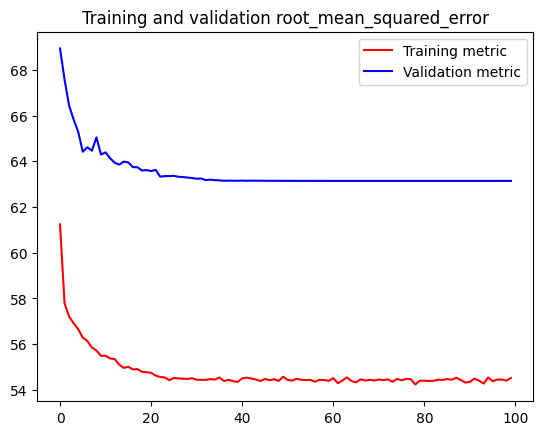

<Figure size 640x480 with 0 Axes>

In [88]:
import matplotlib.pyplot as plt
acc = history.history['root_mean_squared_error']
val_acc = history.history['val_root_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training metric')
plt.plot(epochs, val_acc, 'b', label='Validation metric')
plt.title('Training and validation root_mean_squared_error')
plt.legend(loc=0)
plt.figure()


plt.show()

In [214]:


# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))



In [413]:
history=model.fit(
        traindata,
        validation_data = validatedata,
        #steps_per_epoch = 100,
        epochs = 100,
        #validation_steps = 50,
        verbose = 2,
        callbacks=[lr_schedule])

Epoch 1/100
783/783 - 3s - loss: 276.7545 - root_mean_squared_error: 290.3596 - val_loss: 244.1130 - val_root_mean_squared_error: 259.6231 - lr: 1.0000e-08 - 3s/epoch - 4ms/step
Epoch 2/100
783/783 - 2s - loss: 274.5288 - root_mean_squared_error: 287.2271 - val_loss: 242.1838 - val_root_mean_squared_error: 257.7184 - lr: 1.1220e-08 - 2s/epoch - 2ms/step
Epoch 3/100
783/783 - 2s - loss: 270.0115 - root_mean_squared_error: 282.4392 - val_loss: 239.9549 - val_root_mean_squared_error: 255.5198 - lr: 1.2589e-08 - 2s/epoch - 2ms/step
Epoch 4/100
783/783 - 2s - loss: 265.4789 - root_mean_squared_error: 277.6539 - val_loss: 237.4510 - val_root_mean_squared_error: 253.0507 - lr: 1.4125e-08 - 2s/epoch - 2ms/step
Epoch 5/100
783/783 - 2s - loss: 266.0520 - root_mean_squared_error: 278.7711 - val_loss: 234.6964 - val_root_mean_squared_error: 250.3344 - lr: 1.5849e-08 - 2s/epoch - 2ms/step
Epoch 6/100
783/783 - 2s - loss: 263.4569 - root_mean_squared_error: 276.5013 - val_loss: 231.6627 - val_root_

Epoch 48/100
783/783 - 2s - loss: 83.7812 - root_mean_squared_error: 87.8107 - val_loss: 60.6561 - val_root_mean_squared_error: 68.5608 - lr: 2.2387e-06 - 2s/epoch - 3ms/step
Epoch 49/100
783/783 - 2s - loss: 81.9355 - root_mean_squared_error: 85.8479 - val_loss: 60.0552 - val_root_mean_squared_error: 68.0192 - lr: 2.5119e-06 - 2s/epoch - 3ms/step
Epoch 50/100
783/783 - 2s - loss: 79.2625 - root_mean_squared_error: 83.0241 - val_loss: 59.3926 - val_root_mean_squared_error: 67.4047 - lr: 2.8184e-06 - 2s/epoch - 3ms/step
Epoch 51/100
783/783 - 2s - loss: 75.4358 - root_mean_squared_error: 79.0860 - val_loss: 59.3458 - val_root_mean_squared_error: 67.4326 - lr: 3.1623e-06 - 2s/epoch - 3ms/step
Epoch 52/100
783/783 - 2s - loss: 73.9157 - root_mean_squared_error: 77.5286 - val_loss: 58.5977 - val_root_mean_squared_error: 66.7247 - lr: 3.5481e-06 - 2s/epoch - 3ms/step
Epoch 53/100
783/783 - 2s - loss: 72.8759 - root_mean_squared_error: 76.3262 - val_loss: 57.7779 - val_root_mean_squared_erro

Epoch 95/100
783/783 - 2s - loss: 51.2075 - root_mean_squared_error: 55.3252 - val_loss: 54.0444 - val_root_mean_squared_error: 63.0832 - lr: 5.0119e-04 - 2s/epoch - 3ms/step
Epoch 96/100
783/783 - 2s - loss: 51.1471 - root_mean_squared_error: 55.2660 - val_loss: 54.1371 - val_root_mean_squared_error: 63.3070 - lr: 5.6234e-04 - 2s/epoch - 3ms/step
Epoch 97/100
783/783 - 2s - loss: 51.1589 - root_mean_squared_error: 55.2568 - val_loss: 53.9907 - val_root_mean_squared_error: 63.1188 - lr: 6.3096e-04 - 2s/epoch - 3ms/step
Epoch 98/100
783/783 - 2s - loss: 51.1755 - root_mean_squared_error: 55.2793 - val_loss: 53.9128 - val_root_mean_squared_error: 63.0131 - lr: 7.0795e-04 - 2s/epoch - 3ms/step
Epoch 99/100
783/783 - 2s - loss: 51.1348 - root_mean_squared_error: 55.2167 - val_loss: 53.8552 - val_root_mean_squared_error: 62.9156 - lr: 7.9433e-04 - 2s/epoch - 3ms/step
Epoch 100/100
783/783 - 2s - loss: 51.1287 - root_mean_squared_error: 55.2262 - val_loss: 53.7924 - val_root_mean_squared_err

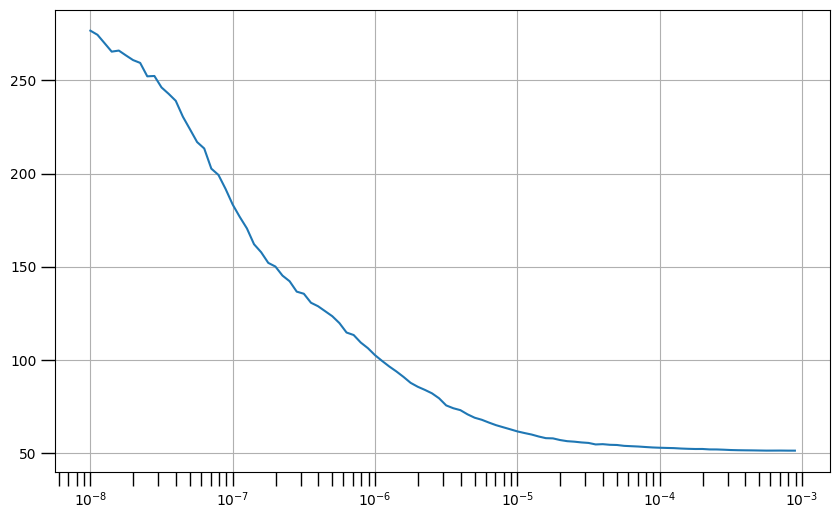

In [414]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
#plt.axis([1e-8, 1e-3, 0, 300])

In [159]:
# predict
#pred_train = pipe.predict(train_images)

# train mse error
#mse = mean_squared_error(train_biomasses, pred_train) 
#mse
#rmse = np.sqrt(mse)

In [19]:
# predict
#pred_validate = pipe.predict(validate_images)

#  validate mse error
#mse = mean_squared_error(validate_biomasses, pred_validate) 
#mse
#rmse = np.sqrt(mse)
3961.942859655493

3961.942859655493

### Gridsearch

 Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier'] = [LinearRegression()]

param2 = {}
param2['classifier__alpha'] = [0.1, 0.5, 1]
param2['classifier'] = [Ridge()]

param3 = {}
param3['classifier__alpha'] = [0.1, 0.5, 1]
param3['classifier'] = [Lasso()]

param4 = {}
param4['classifier__n_neighbors'] = [2,5,10,25,50]
param4['classifier'] = [KNeighborsRegressor()]

"""
param5 = {}
param5['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param5['classifier__epsilon'] = [0.0,0.2,0.5,1]
param5['classifier'] = [LinearSVR()]
"""

pipeline = pipe = Pipeline(steps=[("scaler", CustomScaler(MEAN,STD)),
                       ("flatten", FlattenTransformer()),
                       ("classifier", LinearRegression())])
params = [param1, param2, param3, param4] # param5


 Train the grid search model
grid_search = GridSearchCV(pipeline, params, cv=3, scoring='neg_mean_squared_error').fit(train_images,train_biomasses)

 Best performing model and its corresponding hyperparameters
grid_search.best_params_

model = grid_search.best_estimator_
 predict
pred = model.predict(train_images)

 validate mse error
mse = mean_squared_error(train_biomasses, pred) 
rmse = np.sqrt(mse)

print(mse, rmse)

model = grid_search.best_estimator_
 predict
pred = model.predict(validate_images)

 validate mse error
mse = mean_squared_error(validate_biomasses, pred) 
rmse = np.sqrt(mse)

print(mse, rmse)

### Predict GIZ Biomass

In [132]:
s2_images_h5 = h5py.File("./data/images_test.h5", "r")

In [116]:
from datetime import datetime

def generate_submit(stack, testset):
    X_test=preprocessing(testset, is_test=True)
    print(X_test[0].shape)
    pred_giz=stack.predict(X_test[0])
    print(sum(pred_giz))
    ID_S2_pair = pd.read_csv('./data/UniqueID-SentinelPair.csv')
    
    preds = pd.DataFrame({'Target':pred_giz}).rename_axis('S2_idx').reset_index()
    preds = ID_S2_pair.merge(preds, on='S2_idx').drop(columns=['S2_idx'])
    time=datetime.now()
    preds.to_csv(f'GIZ_Biomass_predictions_{time.strftime("%m_%d_%Y_%H:%M:%S")}.csv', index=False)
    
generate_submit( clf,testset)

(5190, 2704)
252426.24048995972


In [49]:
model.load_weights(checkpoint_filepath)


AttributeError: 'XGBRFRegressor' object has no attribute 'load_weights'

In [41]:
testset.keys()

<KeysViewHDF5 ['agbd', 'cloud', 'images', 'lat', 'lon', 'scl']>

In [47]:
test_cloud.shape

(5190, 15, 15, 1)

In [48]:
testimg=tf.data.Dataset.from_tensor_slices(test_images)

testlat=tf.data.Dataset.from_tensor_slices(test_lat[:,:,0].reshape((-1,15)))
testlon=tf.data.Dataset.from_tensor_slices(test_lon[:,:,0].reshape((-1,15)))
testcloud=tf.data.Dataset.from_tensor_slices(test_cloud[:,:,0].reshape((-1,15)))
testdata=tf.data.Dataset.zip((testimg,testlat, testlon,testcloud)).batch(32)


In [43]:
#prepare test set sentinel 2 images 
#s2_images = np.array(s2_images_h5["images"])
#s2_images = s2_images.transpose(0,3,1,2)

In [44]:
loss_eval, rmse_eval=model.evaluate(validatedata)
loss_eval, rmse_eval
#(54.43159866333008, 63.476097106933594)
#56.93183517456055, 65.77277374267578)



162/162 [==============================] - 0s 1ms/step - loss: 53.0247 - root_mean_squared_error: 61.8605


(53.02470779418945, 61.86053466796875)

In [45]:
model.metrics_names 

['loss', 'root_mean_squared_error']

In [55]:
test_cloud[:,:,0].shape

(5190, 15, 1)

In [56]:
# predict on giz test data
pred_giz = model.predict([test_images,test_lat[:,:,0].reshape((-1,15)), test_lon[:,:,0].reshape((-1,15)),test_cloud[:,:,:].reshape((-1,225)) ])
pred_giz.shape

163/163 [==============================] - 0s 1ms/step


(5190, 1)

In [57]:
pred_giz.max()

94.4302

In [58]:
pred_giz=pred_giz.reshape(1,-1)[0]

In [56]:

preds = pd.DataFrame({'Target':pred_giz}).rename_axis('S2_idx').reset_index()
preds = ID_S2_pair.merge(preds, on='S2_idx').drop(columns=['S2_idx'])

NameError: name 'pred_giz' is not defined

In [57]:
ID_S2_pair

,ID,S2_idx
0,ID_1EB0DGFP07,44
1,ID_844T2PSXTK,58
2,ID_4MCV3S8MLN,27
3,ID_L7441JV5F3,68
4,ID_5GUVM4YEWZ,57
...,...,...
85,ID_MEW6189J1B,41
86,ID_TH9HRUXGTP,52
87,ID_GPC7YS3JG8,79
88,ID_1P7PJMPV0R,0


In [60]:

preds.to_csv(f'GIZ_Biomass_predictions_{rmse_eval}.csv', index=False)

In [61]:
preds

,ID,Target
0,ID_1EB0DGFP07,47.322083
1,ID_844T2PSXTK,39.771774
2,ID_4MCV3S8MLN,35.339512
3,ID_L7441JV5F3,4.117369
4,ID_5GUVM4YEWZ,32.520939
...,...,...
85,ID_MEW6189J1B,58.611908
86,ID_TH9HRUXGTP,66.100426
87,ID_GPC7YS3JG8,39.797985
88,ID_1P7PJMPV0R,59.002762
